# Monte Carlo Method for Getting Expected Value of European Options Price

European options can only be exercised at time of expiration. Thus, we can generate paths with geometric Brownian motion which represents the stock movement of the underlying. Simulating many paths, we can then compute the expected value over all the paths. Each path is generated using

$S_{t+1} = S_t \exp((r-0.5\sigma^2)dt + \sigma \sqrt{dt}Z)$

where
* $S_1$ is the stock price at time $t$
* $r$ is the risk-free interest rate.
* $\sigma$ is the volatility
* $dt$ is the time step
* $Z$ is a standard normal random variable

Let $T$ be the time till expiration from this moment and $K$ the strike price. At the end of each path $(S_T)$, we compute the payoff:
* **Call Option:** $\max(S_T-K,0)$
* **Put Option:** $\max(K-S_T,0)$

We want to value the options today though they are exercised in the future. Hence, we discount the expected payoff using the risk-free rate $r$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

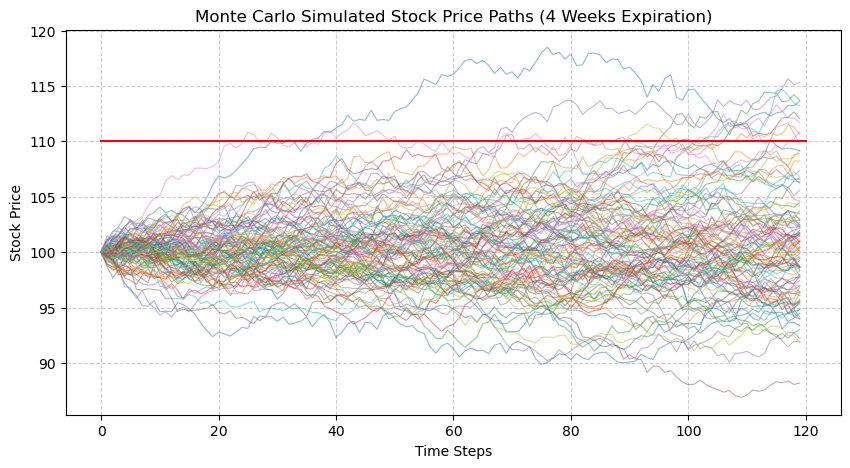

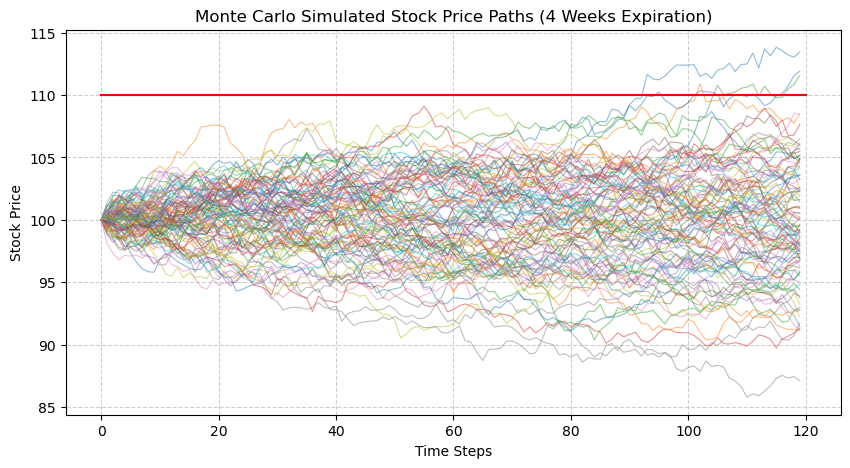

Estimated European Call Option Value: 0.10468757700342633
Estimated European Put Option Value: 9.972900117450049


In [5]:
def monte_carlo_option_pricing(S, K, T_weeks, r, sigma, num_simulations, updates_per_day=1, option_type="call"):
    days_per_week = 5  # Trading days per week
    total_days = T_weeks * days_per_week  # Total trading days to expiration
    num_steps = total_days * updates_per_day  # More frequent updates per day
    dt = 1 / (252 * updates_per_day)  # Time step in years

    paths = np.zeros((num_simulations, num_steps))
    paths[:, 0] = S  # Start at initial stock price

    for t in range(1, num_steps):
        Z = np.random.normal(size=num_simulations)  # Standard normal random variables
        paths[:, t] = paths[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

    # Determine payoffs based on option type
    if option_type == "call":
        payoffs = np.maximum(paths[:, -1] - K, 0)  # Call option payoff
    elif option_type == "put":
        payoffs = np.maximum(K - paths[:, -1], 0)  # Put option payoff
    else:
        raise ValueError("Invalid option_type. Choose 'call' or 'put'.")

    # Discount payoffs to present value
    discounted_payoffs = payoffs * np.exp(-r * (total_days / 252))  # Convert days to years

    # Estimate option price
    option_value = np.mean(discounted_payoffs)

    # Plot a subset of paths
    plt.figure(figsize=(10, 5))
    for i in range(min(100, num_simulations)):  # Plot only 100 paths
        plt.plot(paths[i], alpha=0.5, linewidth=0.8)

    plt.plot([0,num_steps],[K,K],color='r') # line of the strike price
    plt.xlabel("Time Steps")
    plt.ylabel("Stock Price")
    plt.title(f"Monte Carlo Simulated Stock Price Paths ({T_weeks} Weeks Expiration)")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    return option_value

# Parameters
S = 100       # Initial stock price
K = 110       # Strike price
T_weeks = 4   # Expiration in weeks (e.g., 4 weeks = 20 trading days)
r = 0.02      # Risk-free rate
sigma = 0.20  # Volatility
num_simulations = 10000  # Number of Monte Carlo simulations
updates_per_day = 6  # Pricing updates per day (1 = daily, 6 = hourly, etc.)

# Estimate call and put option values
call_price = monte_carlo_option_pricing(S, K, T_weeks, r, sigma, num_simulations, updates_per_day, "call")
put_price = monte_carlo_option_pricing(S, K, T_weeks, r, sigma, num_simulations, updates_per_day, "put")

print("Estimated European Call Option Value:", call_price)
print("Estimated European Put Option Value:", put_price)
